original_image_size =  28
output size =  26


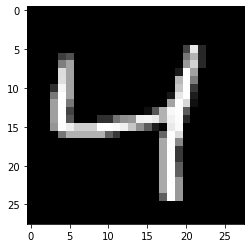

In [1]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# mnist data download
(x_train, t_train), (x_test, t_test) = mnist.load_data()
plt.imshow(x_train[2], cmap='gray') 
import numpy as np
horizontal_filter = np.array([[1., 1., 1.], 
 [0., 0., 0.], 
[-1., -1., -1.]])
vertical_filter = np.array([[1., 0., -1.],
 [1., 0., -1.],
[1., 0., -1.]])
test_image = x_train[2]
original_image_size = test_image.shape[0]
print("original_image_size = ", original_image_size)
conv_output_size = int((original_image_size - 3)/1 + 1)
print('output size = ', conv_output_size)
filter_size = 3

In [3]:
def get_conv_image(filter):
 filtered_image = np.zeros((conv_output_size, conv_output_size))
 for i in range(conv_output_size):
    for j in range(conv_output_size):
 # 합성곱 연산
     indice_image = test_image[i:(i + filter_size), j:(j + filter_size)] * filter
     indice_sum = np.sum(indice_image)
     if(indice_sum > 255):
         indice_sum = 255
     filtered_image[i, j] = indice_sum
 return filtered_image 

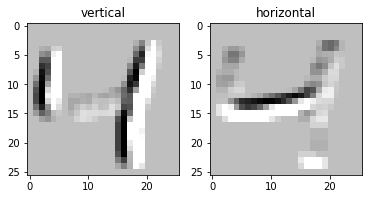

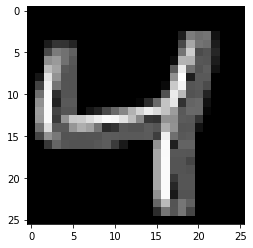

In [4]:
vertical_filtered_image = get_conv_image(vertical_filter)
horizontal_filtered_image = get_conv_image(horizontal_filter)
plt.subplot(1, 2, 1)
plt.title('vertical')
plt.imshow(vertical_filtered_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('horizontal')
plt.imshow(horizontal_filtered_image, cmap='gray')
plt.show()
sobel_image = np.sqrt(np.square(horizontal_filtered_image) + np.square(vertical_filtered_image)) 
plt.imshow(sobel_image,cmap='gray')

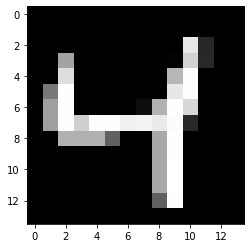

In [5]:
import numpy as np
image = x_train[2]
image_x = image.shape[0]
image_y = image.shape[1]
new_image_x = int(image_x / 2)
new_image_y = int(image_y / 2)
pooled_image = np.zeros((new_image_x, new_image_y))
for x in range(0, image_x, 2):
 for y in range(0, image_y, 2):
  pooled_image[int(x/2), int(y/2)] = np.max(image[x:x + 2, y:y + 2]) # pool_size(2,2)
 
plt.imshow(pooled_image, cmap='gray')

Conv2D(16, 3 or (3,3), padding='valid', input_shape=(28, 28, 1), activation='relu')
첫번째 인자 : 컨볼루션 필터의 수
두번째 인자 : 컨볼루션 커널의 (행, 열) 크기
padding : 경계 처리 방법 정의.
'valid' : 유효한 영역만 출력.출력 이미지 사이즈는 입력 사이즈보다 작아진다.
'same' : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일하다.
input_shape : 샘플 수를 제외한 입력 형태 정의. 모델에서 첫 레이어일 때만 정의한다.
(행, 열, 채널 수)로 정의한다. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정한다.
activation : 활성화 함수를 설정한다.
'linear' : 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나온다.default=None
'relu' : rectifier 함수, 은익층에 주로 쓰인다.
'sigmoid' : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰인다.
'softmax' : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰인다.


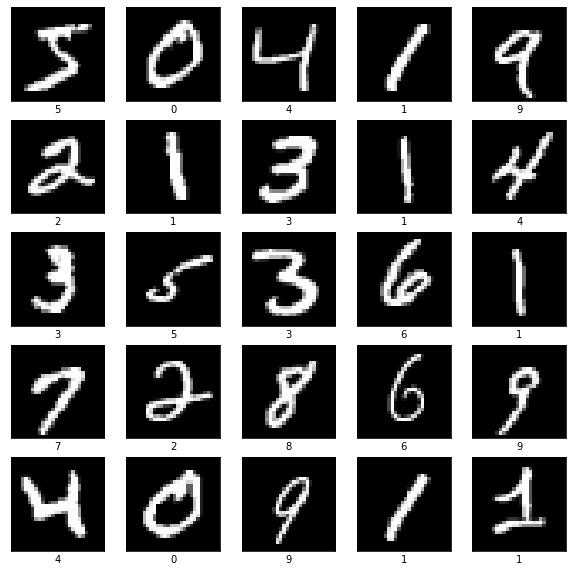

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
mnist = tf.keras.datasets.mnist # Mnist 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 전처리
plt.figure(figsize=(10,10))
for index in range(25):
 plt.subplot(5, 5, index+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(x_train[index], cmap='gray')
 plt.xlabel(str(y_train[index]))
plt.show()

In [7]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Reshape((28, 28, 1)),
 tf.keras.layers.Conv2D(16, 3, activation='relu'),
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128),
 tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1494 - accuracy: 0.9546
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0604 - accuracy: 0.9817
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0424 - accuracy: 0.9865
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0312 - accuracy: 0.9899
Epoch 5/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0231 - accuracy: 0.9920
313/313 - 1s - loss: 0.0747 - accuracy: 0.9782


[0.07471256703138351, 0.9782000184059143]

In [8]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               346240    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 28s 7ms/step - loss: 0.3241 - accuracy: 0.9050
Epoch 2/5
1875

[0.043234508484601974, 0.9860000014305115]

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
# 데이터 로드
cifar10 = datasets.cifar10 
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("Train samples:", train_images.shape, train_labels.shape)
print("Test samples:", test_images.shape, test_labels.shape)
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))
print("Train samples(reshape):", train_images.shape, train_labels.shape)
print("Test samples(reshape):", test_images.shape, test_labels.shape)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))

170500096/170498071 [==============================] - 203s 1us/step
Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)
Train samples(reshape): (50000, 32, 32, 3) (50000, 1)
Test samples(reshape): (10000, 32, 32, 3) (10000, 1)


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

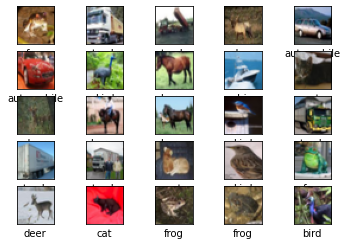

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [10]:
for i in range(25):
 plt.subplot(5, 5, i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_images[i])
 plt.xlabel(class_names[train_labels[i][0]])
plt.show()
# 전처리 작업
train_images = train_images/255.0
test_images = test_images/255.0
# 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
predictions = model.predict(test_images)
def plot_image(i, predictions_array, true_label, img):
 predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
 plt.grid(False)
 plt.xticks([])
 plt.yticks([])
 plt.imshow(img, cmap=plt.cm.binary)
 predicted_label = np.argmax(predictions_array)
 if predicted_label == true_label:
  color = 'blue'
 else:
  color = 'red'
 plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
 100*np.max(predictions_array),
 class_names[true_label[0]]),
 color=color)

Epoch 1/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.5145 - accuracy: 0.4475
Epoch 2/10
1563/1563 [==============================] - 21s 14ms/step - loss: 1.1480 - accuracy: 0.5929
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0001 - accuracy: 0.6480
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9079 - accuracy: 0.6801
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8373 - accuracy: 0.7070
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7790 - accuracy: 0.7264
Epoch 7/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7312 - accuracy: 0.7441
Epoch 8/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6884 - accuracy: 0.7601
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6546 - accuracy: 0.7694
Epoch 10/10
313/313 [==============================] - 2s 4ms/st

In [12]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 21s 13ms/step - loss: 0.5868 - accuracy: 0.7930
Epoch 2/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5528 - accuracy: 0.8044
Epoch 3/20
1563/1563 [==============================] - 21s 14ms/step - loss: 0.5292 - accuracy: 0.8132
Epoch 4/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5026 - accuracy: 0.8230
Epoch 5/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4772 - accuracy: 0.8295
Epoch 6/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4521 - accuracy: 0.8400
Epoch 7/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4294 - accuracy: 0.8470
Epoch 8/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4056 - accuracy: 0.8546
Epoch 9/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3851 - accuracy: 0.8632
Epoch 10/20
1563/1563 [==============================] - 23s 14m

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.5853 - accuracy: 0.6790
Test loss: 1.5852582454681396
Test accuracy: 0.6790000200271606


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.5853 - accuracy: 0.6790
Test loss: 1.5852582454681396
Test accuracy: 0.6790000200271606
